# Assignment 20: Time Series Analysis

## Dataset: Exchange Rate Data

**Topics Covered:**
- Time Series Decomposition
- Stationarity Testing
- ARIMA Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
df = pd.read_csv('datasets/exchange_rate.csv')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (5113, 2)


,Date,Rate
0,2010-01-01,45.2178
1,2010-01-02,44.5712
2,2010-01-03,45.4559
3,2010-01-04,44.8772
4,2010-01-05,44.7906


In [2]:
# Parse dates and set index
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col])
df.set_index(date_col, inplace=True)

# Select the value column
value_col = df.select_dtypes(include=[np.number]).columns[0]
ts = df[value_col]

print("Time series ready!")
print("Date range:", ts.index.min(), "to", ts.index.max())

Time series ready!
Date range: 2010-01-01 00:00:00 to 2023-12-31 00:00:00


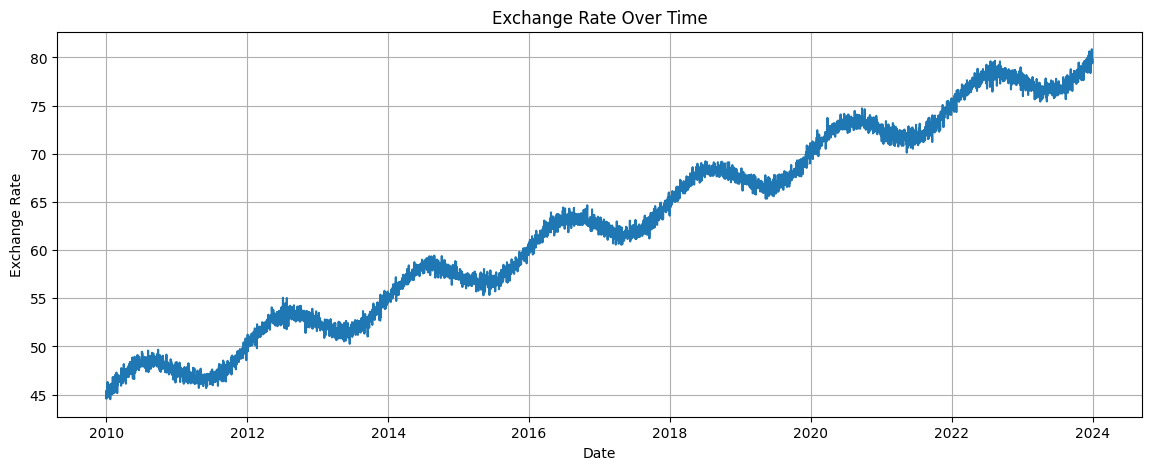

In [3]:
# Plot time series
plt.figure(figsize=(14, 5))
plt.plot(ts)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

=== Time Series Decomposition ===


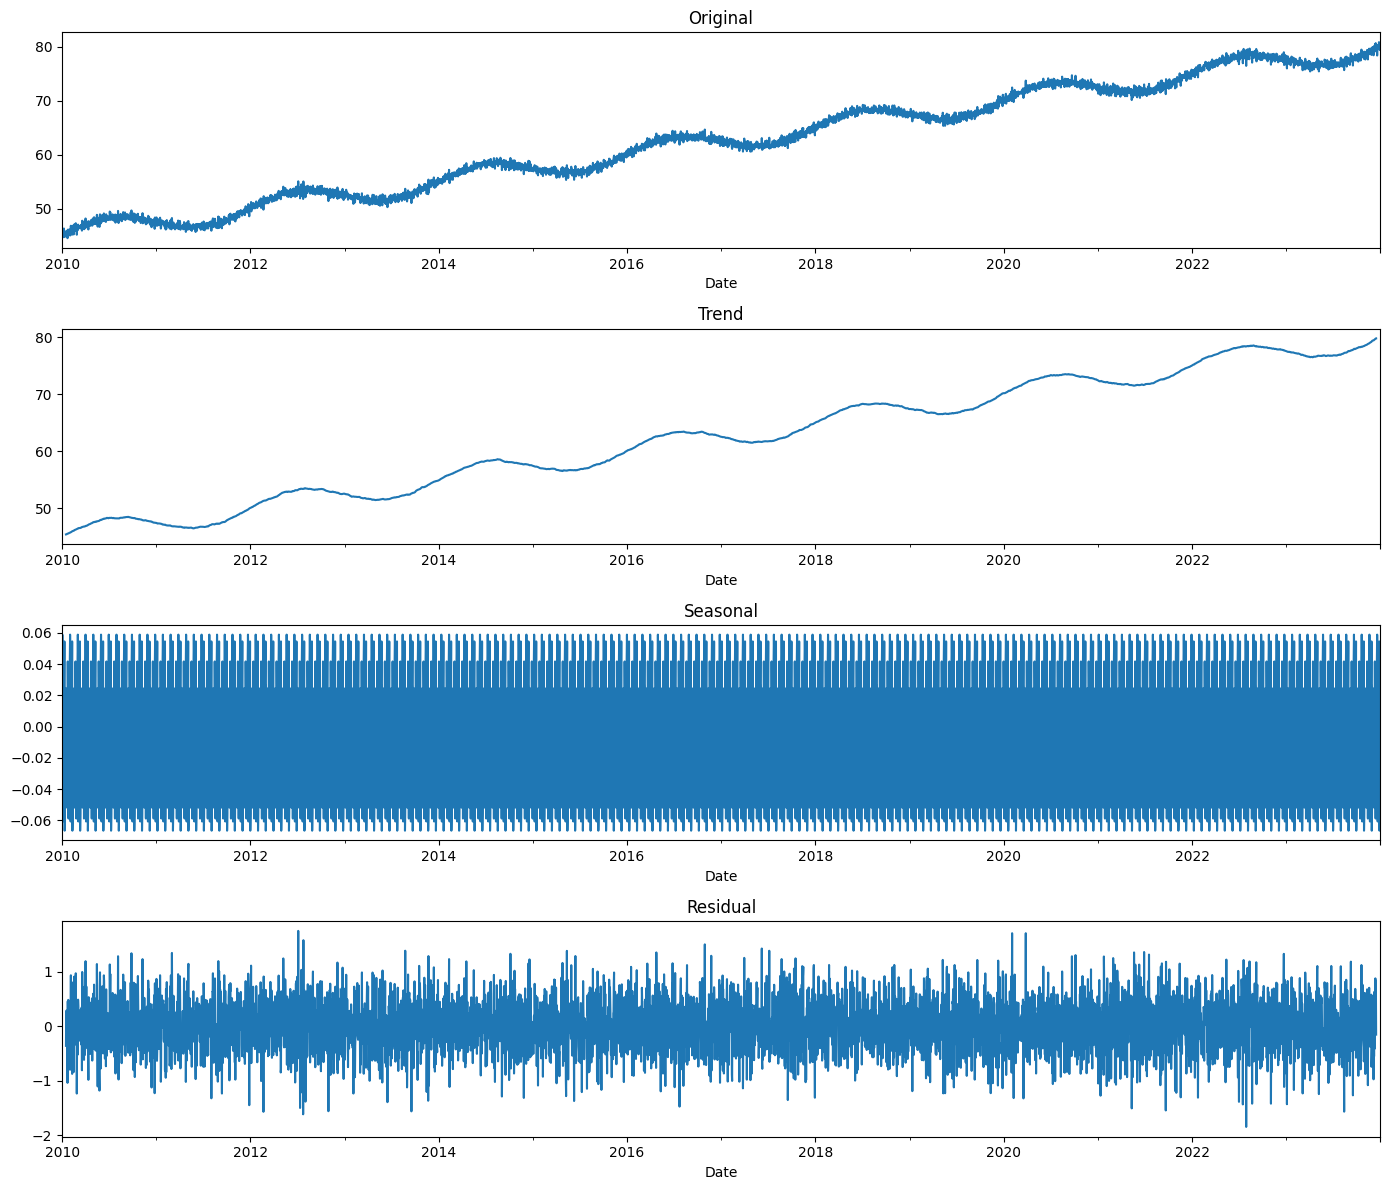

In [4]:
# Decomposition
print("=== Time Series Decomposition ===")

# Use a subset for decomposition if data is too large
decomposition = seasonal_decompose(ts.dropna(), model='additive', period=30)

fig, axes = plt.subplots(4, 1, figsize=(14, 12))
decomposition.observed.plot(ax=axes[0], title='Original')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

In [5]:
# Stationarity Test (ADF Test)
print("=== ADF Test for Stationarity ===")

result = adfuller(ts.dropna())
print("ADF Statistic:", round(result[0], 4))
print("p-value:", round(result[1], 4))

if result[1] < 0.05:
    print("Result: Series is STATIONARY")
else:
    print("Result: Series is NON-STATIONARY")

=== ADF Test for Stationarity ===
ADF Statistic: -0.172
p-value: 0.9418
Result: Series is NON-STATIONARY


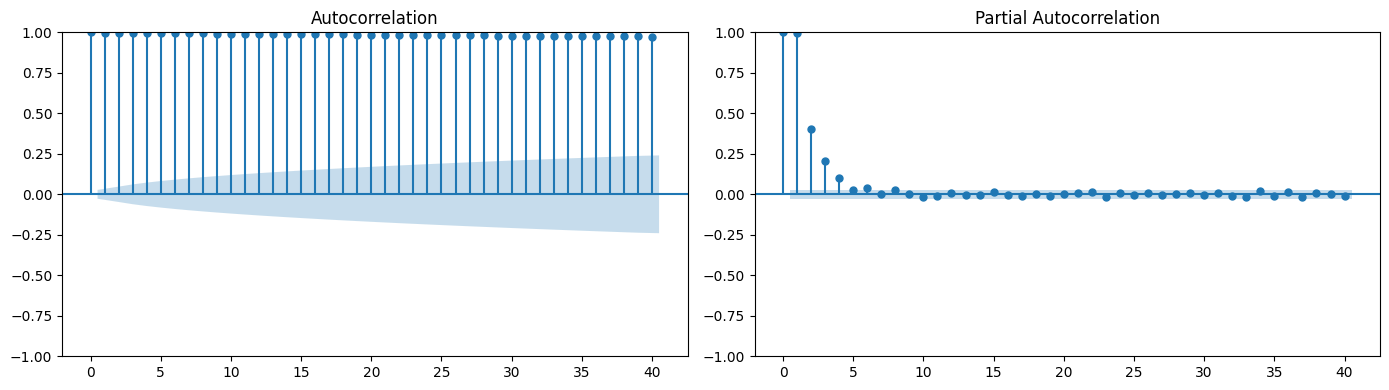

In [6]:
# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(ts.dropna(), ax=axes[0], lags=40)
plot_pacf(ts.dropna(), ax=axes[1], lags=40)
plt.tight_layout()
plt.show()

In [7]:
# ARIMA Model
print("=== ARIMA Model ===")

# Use a subset for faster training
ts_subset = ts.dropna()[-500:]

# Split into train/test
train_size = int(len(ts_subset) * 0.8)
train = ts_subset[:train_size]
test = ts_subset[train_size:]

# Fit ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

=== ARIMA Model ===
                               SARIMAX Results                                
Dep. Variable:                   Rate   No. Observations:                  400
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -315.745
Date:                Mon, 19 Jan 2026   AIC                            637.489
Time:                        21:21:20   BIC                            649.456
Sample:                    08-19-2022   HQIC                           642.229
                         - 09-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0475      0.053      0.889      0.374      -0.057       0.152
ma.L1         -0.9123      0.024    -38.264      0.000      -0.959      -0.866
sigma2         0.2838      0.020

c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


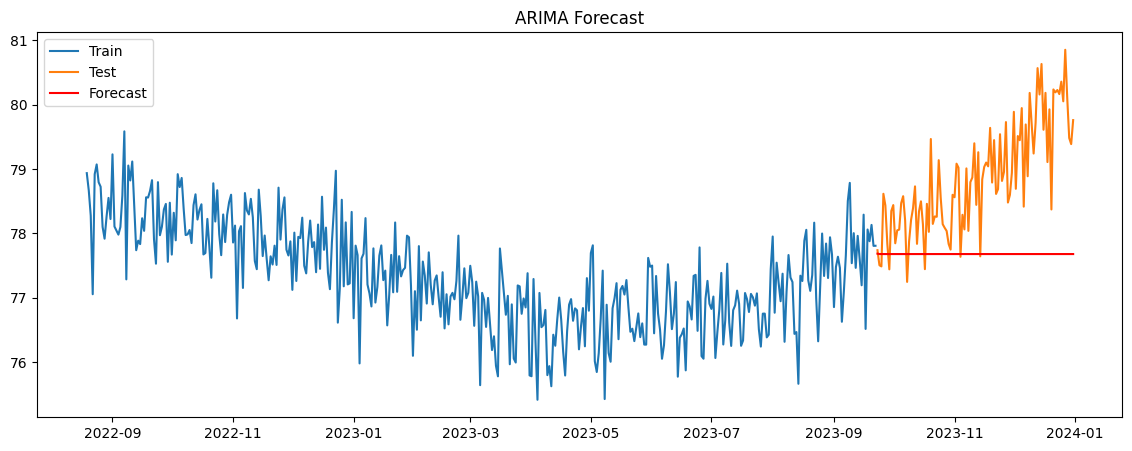

In [8]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(14, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

## Exponential Smoothing

=== Exponential Smoothing Model ===


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


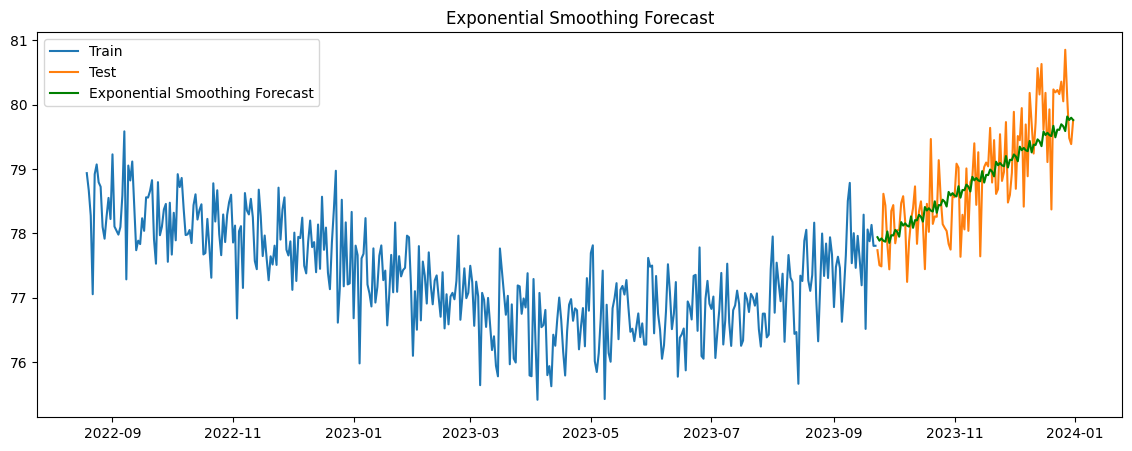

Exponential Smoothing MAE: 0.4345
Exponential Smoothing RMSE: 0.5276


In [9]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("=== Exponential Smoothing Model ===")

# Fit Exponential Smoothing model
# Using 'add' for additive trend and seasonal components
exp_model = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add', initialization_method='estimated').fit()
exp_forecast = exp_model.forecast(len(test))

# Plot the forecast
plt.figure(figsize=(14, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()

# Evaluate the model
mae_exp = mean_absolute_error(test, exp_forecast)
rmse_exp = np.sqrt(mean_squared_error(test, exp_forecast))
print(f"Exponential Smoothing MAE: {round(mae_exp, 4)}")
print(f"Exponential Smoothing RMSE: {round(rmse_exp, 4)}")

## ARIMA Hyperparameter Tuning


=== ARIMA Hyperparameter Tuning ===
ARIMA(0, 0, 0) AIC=958.0487568168729
ARIMA(0, 0, 1) AIC=852.8965213670833
ARIMA(0, 0, 2) AIC=815.423229055524
ARIMA(0, 1, 0) AIC=855.355840457103
ARIMA(0, 1, 1) AIC=636.3001565083548
ARIMA(0, 1, 2) AIC=637.427727010089
ARIMA(1, 0, 0) AIC=775.871639637675
ARIMA(1, 0, 1) AIC=641.4665853038617
ARIMA(1, 0, 2) AIC=642.59780066281
ARIMA(1, 1, 0) AIC=764.4100266600888
ARIMA(1, 1, 1) AIC=637.4892184208322
ARIMA(1, 1, 2) AIC=638.6847996798892
ARIMA(2, 0, 0) AIC=733.8129388830096
ARIMA(2, 0, 1) AIC=642.6592057335956
ARIMA(2, 0, 2) AIC=642.1189740728812
ARIMA(2, 1, 0) AIC=723.731689420642
ARIMA(2, 1, 1) AIC=638.9820773154112
ARIMA(2, 1, 2) AIC=640.6658691042512

Best ARIMA(0, 1, 1) AIC=636.3001565083548


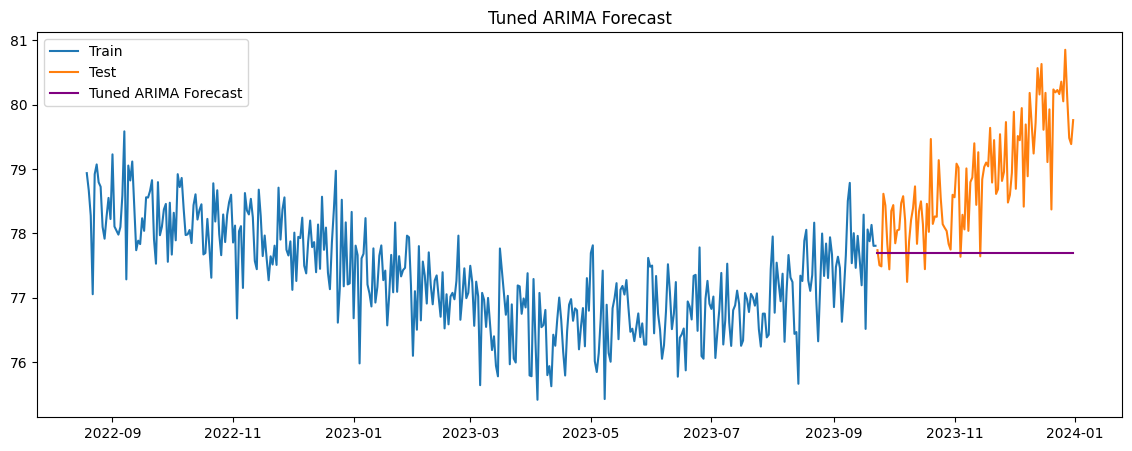

Tuned ARIMA MAE: 1.1959
Tuned ARIMA RMSE: 1.4413


In [10]:
# ARIMA Hyperparameter Tuning (Grid Search with AIC)
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

print("\n=== ARIMA Hyperparameter Tuning ===")

p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model_tuned = ARIMA(train, order=order)
                model_fit_tuned = model_tuned.fit()
                if model_fit_tuned.aic < best_score:
                    best_score, best_cfg = model_fit_tuned.aic, order
                print(f'ARIMA{order} AIC={model_fit_tuned.aic}')
            except:
                continue

print(f"\nBest ARIMA{best_cfg} AIC={best_score}")

# Fit best model and forecast
best_model = ARIMA(train, order=best_cfg)
best_model_fit = best_model.fit()
best_forecast = best_model_fit.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(14, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, best_forecast, label='Tuned ARIMA Forecast', color='purple')
plt.legend()
plt.title('Tuned ARIMA Forecast')
plt.show()

# Evaluate the tuned model
mae_tuned = mean_absolute_error(test, best_forecast)
rmse_tuned = np.sqrt(mean_squared_error(test, best_forecast))
print(f"Tuned ARIMA MAE: {round(mae_tuned, 4)}")
print(f"Tuned ARIMA RMSE: {round(rmse_tuned, 4)}")

## Summary

- Decomposed time series into trend, seasonal, and residual
- Tested for stationarity using ADF test
- Built ARIMA model for forecasting